## Lab 2 Template

zID:z5280110 

Name: Xuan Wei

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [30]:
import math
import numpy as np
import sys

import cv2
import matplotlib.pyplot as plt

In [31]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [32]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [33]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Beehive_Corner_Adelaide.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

In [34]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)

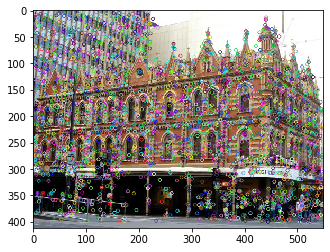

In [43]:
img = cv2.imread('Beehive_Corner_Adelaide.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Calculate keypoint
sift = SiftDetector()
kps, des = SiftDetector().detector.detectAndCompute(img, None)

# show keypoint
sift_img1 = cv2.drawKeypoints(img, kps, np.array([]))
plt.imshow(sift_img1)
plt.show()

# explanation
The methods to change the two parameters are listed below, and the following task chooses to change contrast_threshold
Because feature is to rank the feature points sent by the detection, return the best natures feature points.
ContrashtThreshold is the threshold for filtering out poor feature points.
The principles of the two are similar, however, n_feature will accurately control the number of feature points, so the other two tasks cannot match 10%, so I chose contrast_threshold.

In [44]:
# change number of contrastThreshold
new_params = {"n_features": 0, "n_octave_layers": 3, "contrast_threshold": 0.162, "edge_threshold": 10, "sigma": 1.6}
sift_2_contrast = SiftDetector(params=new_params)
kps_2_contrast, des_2_contrast = sift_2_contrast.detector.detectAndCompute(img, None)
print(len(kps_2_contrast))

369


In [45]:
# change number of n_feature
new_params = {"n_features":370,"n_octave_layers":3,"contrast_threshold":0.03 ,"edge_threshold":10,"sigma":1.6}
sift_2_feature = SiftDetector(params=new_params)
kps_2_feature, des_2_feature = sift_2_feature.detector.detectAndCompute(img,None)
print(len(kps_2_feature))

371


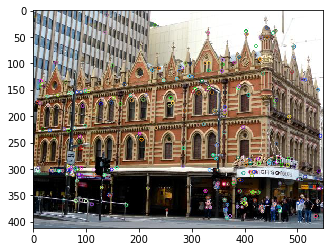

In [46]:
sift_img2 = cv2.drawKeypoints(img, kps_2_feature, np.array([]))
plt.imshow(sift_img2)
plt.show()

## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


In [47]:
# Write your code here and display images obtained in 2(b) and 2(d). Also, write your answer to 2(c) in a new cell.

In [48]:
#Zoom in to 120%
enlarge_img = cv2.resize(img, (0, 0), fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)

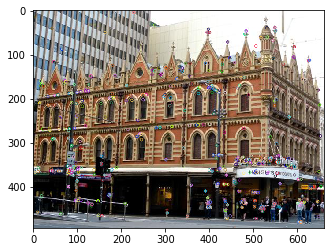

In [49]:
# change number of contrastThreshold
new_params = {"n_features": 0, "n_octave_layers": 3, "contrast_threshold": 0.162, "edge_threshold": 10, "sigma": 1.6}
sift_enlarge = SiftDetector(params=new_params)
enlarge_kps, enlarge_des = sift_enlarge.detector.detectAndCompute(enlarge_img, None)

sift_enlarge_img = cv2.drawKeypoints(enlarge_img, enlarge_kps, np.array([]))
plt.imshow(sift_enlarge_img)
plt.show()

# c) Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
The positions of the keypoints in the two images are roughly the same, indicating that zooming the image does not change the keypoints.

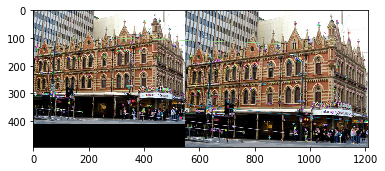

In [58]:
# Connect matching points
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_2_contrast, enlarge_des, k=2)
good_point = []
for m, n in matches:
    if m.distance < 0.07 * n.distance:
        good_point.append([m])
# Use parameters to make the best match five
result = cv2.drawMatchesKnn(sift_img2, kps_2_contrast, sift_enlarge_img, enlarge_kps, good_point, None, flags=2)
plt.imshow(result)
plt.show()

## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 60 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

In [51]:
# Write your code here and display images obtained in 3(b) and 3(d). Also, write your answer to 3(c) in a new cell.

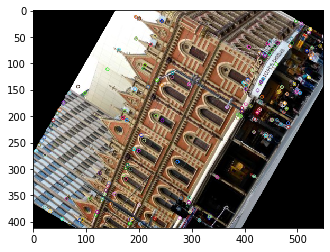

In [54]:
img_center = get_img_center(img)
angle = 60
rotate_img = rotate(img, img_center[1], img_center[0], angle)

new_params = {"n_features": 0, "n_octave_layers": 3, "contrast_threshold": 0.162, "edge_threshold": 10, "sigma": 1.6}
sift_contrast = SiftDetector(params=new_params)
rotate_kps, rotate_des = sift_2_contrast.detector.detectAndCompute(rotate_img, None)

sift_rotate_img = cv2.drawKeypoints(rotate_img, rotate_kps, np.array([]))
plt.imshow(sift_rotate_img)
plt.show()

# c) Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
The positions of the keypoints in the two images are roughly the same, indicating that rotating the image does not change the keypoints.

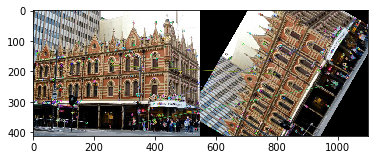

In [56]:
# Connect matching points
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_2_contrast, rotate_des, k=2)
good_point = []
for m, n in matches:
    if m.distance < 0.08 * n.distance:
        good_point.append([m])
# Use parameters to make the best match five
result = cv2.drawMatchesKnn(sift_img2, kps_2_contrast, sift_rotate_img, rotate_kps, good_point, None, flags=2)
plt.imshow(result)
plt.show()